In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ss=StandardScaler()
le=LabelEncoder()

In [6]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\Data\\breast_cancer_data\\data.csv")
data.shape

(569, 32)

In [7]:
data["diagnosis"]=le.fit_transform(data["diagnosis"])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X=data.iloc[:,2:]
X
y=data.iloc[:,1]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train=ss.fit_transform(X_train)
X_train
X_test=ss.fit_transform(X_test)
X_test

array([[-0.45292441, -0.19214799, -0.42928006, ..., -0.20791229,
         0.14903124,  0.14487862],
       [ 1.45260534,  0.4230057 ,  1.37249228, ...,  0.94248977,
        -0.63989262, -1.00553077],
       [ 0.42768362,  0.00760671,  0.444268  , ...,  0.53375519,
        -0.152566  , -0.24426958],
       ...,
       [-0.08772242,  0.31404859, -0.04315571, ...,  0.59618011,
         0.45914818,  1.61416594],
       [ 0.13611106,  1.25834355,  0.19462229, ...,  0.07448615,
         0.44381272,  0.93275732],
       [-0.13779044, -1.15460247, -0.15928971, ...,  0.19784968,
         0.08598549, -0.64885595]])

In [11]:
log=LogisticRegression()
log.fit(X_train,y_train)
log_pred=log.predict(X_test)

accuracy_score(y_test,log_pred)

0.9946808510638298

In [12]:
pd.crosstab(y_test,log_pred)

col_0,0,1
diagnosis,,
0,121,0
1,1,66


In [13]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       121
           1       1.00      0.99      0.99        67

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [15]:
confusion_matrix(y_test, log_pred)

array([[121,   0],
       [  1,  66]], dtype=int64)

## Logistic Regression- ROC & AUC Curve 

In [17]:
log_fpr,log_tpr,threshold=roc_curve(y_test,log_pred)
log_auc=auc(log_fpr,log_tpr)
log_auc

0.9925373134328358

In [21]:
print(roc_auc_score(y_test,log_pred)," For Logistic Regression")
print(roc_auc_score(y_test,knn_pred)," For KNN")

0.9925373134328358  For Logistic Regression
0.9469594177870976  For KNN


In [22]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
accuracy_score(y_test,knn_pred)

0.9574468085106383

In [23]:
knn_fpr,knn_tpr,threshold=roc_curve(y_test,knn_pred)
knn_auc=auc(knn_fpr,knn_tpr)
knn_auc

0.9469594177870976

In [24]:
confusion_matrix(y_test,knn_pred)

array([[119,   2],
       [  6,  61]], dtype=int64)

In [25]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       121
           1       0.97      0.91      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [82]:
#PLotting the AUC & ROC Curve

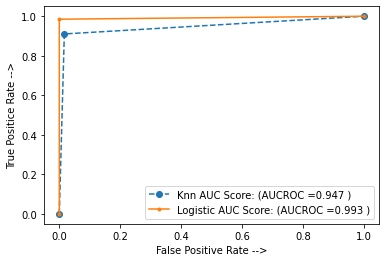

In [27]:
plt.plot(knn_fpr,knn_tpr,marker="o",linestyle="--",label="Knn AUC Score: (AUCROC =%0.3f )" % knn_auc)
plt.plot(log_fpr,log_tpr,marker=".",linestyle="solid",label="Logistic AUC Score: (AUCROC =%0.3f )" % log_auc)
plt.xlabel("False Positive Rate -->")
plt.legend()
plt.ylabel("True Positice Rate -->");

In [36]:
log.predict_proba(X_test)[:,1]>0.7,1,0

array([1.27785087e-01, 9.99991630e-01, 9.96451784e-01, 5.32232160e-04,
       8.97244021e-05, 1.00000000e+00, 9.99999998e-01, 9.73984544e-01,
       3.33185100e-01, 7.04088825e-04, 3.65618340e-02, 9.90958652e-01,
       5.00300578e-03, 8.69879338e-01, 1.49463025e-03, 9.98978245e-01,
       2.16740181e-03, 1.31035238e-05, 9.80277713e-07, 9.99998699e-01,
       6.16185587e-02, 1.05265576e-02, 9.99999991e-01, 6.86441273e-05,
       1.41517242e-03, 9.01736398e-04, 1.20910432e-03, 5.98500382e-03,
       2.93686689e-03, 9.99983699e-01, 7.84012120e-04, 1.54728969e-04,
       5.84266865e-03, 4.54574404e-03, 1.66815797e-04, 3.63251880e-03,
       9.12671107e-01, 8.88084054e-03, 9.99857409e-01, 4.44570490e-02,
       1.28986972e-04, 9.99611972e-01, 3.29213069e-03, 9.20939647e-04,
       4.66860335e-02, 5.55184503e-02, 7.68154068e-04, 5.73029616e-04,
       2.46825028e-02, 1.05932276e-03, 9.99818684e-01, 9.99999939e-01,
       2.20456796e-01, 3.91102240e-02, 4.27558562e-05, 7.86428840e-03,
      

## Confusion Metrix of ROC Score with Different Threshold

In [38]:
th3=np.where(log.predict_proba(X_test)[:,1]>0.3,1,0)#Threshold is 0.3
th4=np.where(log.predict_proba(X_test)[:,1]>0.4,1,0)#Threshold is 0.4
th6=np.where(log.predict_proba(X_test)[:,1]>0.6,1,0)#Threshold is 0.6
th7=np.where(log.predict_proba(X_test)[:,1]>0.7,1,0)#Threshold is 0.7
th8=np.where(log.predict_proba(X_test)[:,1]>0.8,1,0)#Threshold is 0.8

In [39]:
pd.crosstab(y_test,th3)

col_0,0,1
diagnosis,,
0,117,4
1,1,66


In [40]:
pd.crosstab(y_test,th4)

col_0,0,1
diagnosis,,
0,119,2
1,1,66


In [25]:
pd.crosstab(y_test,th6)

col_0,0,1
diagnosis,,
0,121,0
1,3,64


In [26]:
pd.crosstab(y_test,th7)

col_0,0,1
diagnosis,,
0,121,0
1,3,64


In [27]:
pd.crosstab(y_test,th8)

col_0,0,1
diagnosis,,
0,121,0
1,4,63


In [42]:
def predict_threshold(model,X_test,threshold):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>threshold,1,0)

In [43]:
for i in np.arange(0,1,0.1):
    print(i)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


In [50]:
for i in np.arange(0,1,0.1):
    y_predict=predict_threshold(log,X_test,i)
    print("Threshold: ",np.round(i,2))
    print(confusion_matrix(y_test,y_predict))
    print(np.round(accuracy_score(y_test,y_predict),3))
    print()

Threshold:  0.0
[[  0 121]
 [  0  67]]
0.356

Threshold:  0.1
[[109  12]
 [  1  66]]
0.931

Threshold:  0.2
[[113   8]
 [  1  66]]
0.952

Threshold:  0.3
[[117   4]
 [  1  66]]
0.973

Threshold:  0.4
[[119   2]
 [  1  66]]
0.984

Threshold:  0.5
[[121   0]
 [  1  66]]
0.995

Threshold:  0.6
[[121   0]
 [  3  64]]
0.984

Threshold:  0.7
[[121   0]
 [  3  64]]
0.984

Threshold:  0.8
[[121   0]
 [  4  63]]
0.979

Threshold:  0.9
[[121   0]
 [  7  60]]
0.963

